# Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Underfitting and Overfitting: KNN
>## Table of Contents

In [2]:
df = pd.read_csv('data/Data/bankloan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
feature = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [4]:
X = df[feature]
y = df[target]

>### Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2020)

>### Standardization Process

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit untuk mempelajari datanya dulu
# Minmaxscaler diminta mempelajari data X_train (tiap kolom), 
# minmaxscaler punya rumus (xi - min(x))/(max(x) - min(x)) --> datanya dimasukkan ke rumus itu.
# ketika transform dipanggil maka data lama diganti ke data hasil rumus scaler nya.

# transform untuk mengubah data X_train supaya lebih mudah dicerna

In [7]:
X_train.describe()

,employ,debtinc,creddebt,othdebt
count,560.000000,560.000000,560.000000,560.000000
mean,8.564286,10.303571,1.598840,3.117190
std,6.631049,6.853099,2.149230,3.349780
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.175000,0.369854,1.049471
50%,7.000000,8.800000,0.890707,2.038053
75%,13.000000,14.300000,1.978249,4.005186
max,31.000000,41.300000,20.561310,27.033600


In [8]:
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [9]:
display(X_train.describe())
display(df_X_train_scaled.describe())

,employ,debtinc,creddebt,othdebt
count,560.000000,560.000000,560.000000,560.000000
mean,8.564286,10.303571,1.598840,3.117190
std,6.631049,6.853099,2.149230,3.349780
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.175000,0.369854,1.049471
50%,7.000000,8.800000,0.890707,2.038053
75%,13.000000,14.300000,1.978249,4.005186
max,31.000000,41.300000,20.561310,27.033600


,employ,debtinc,creddebt,othdebt
count,560.000000,560.000000,560.000000,560.000000
mean,0.276267,0.242141,0.077235,0.113814
std,0.213905,0.167557,0.104587,0.124121
min,0.000000,0.000000,0.000000,0.000000
25%,0.096774,0.116748,0.017429,0.037198
50%,0.225806,0.205379,0.042775,0.073828
75%,0.419355,0.339853,0.095698,0.146717
max,1.000000,1.000000,1.000000,1.000000


>### KNN with Scaling

In [10]:
k = range(1,100,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_scaled, y_train)
    
    y_pred_train = knn_i.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn_i.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

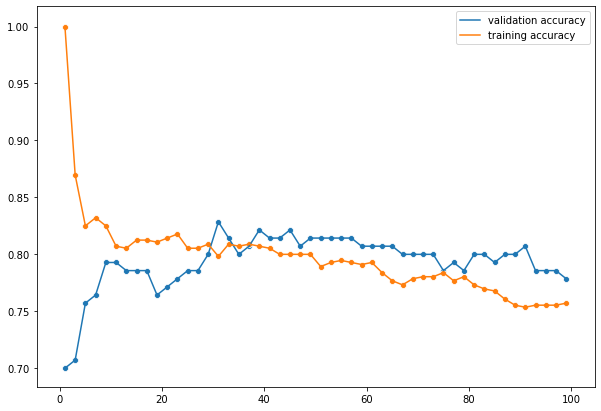

In [14]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, label='validation accuracy')
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies, label='training accuracy')
sns.scatterplot(k, training_accuracies)

plt.show()

## Model Complexity: Decision Tree
>### Table of Contents

In [15]:
k = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
    dtc_i = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtc_i.fit(X_train, y_train)
    
    y_pred_train = dtc_i.predict(X_train)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = dtc_i.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i

NameError: name 'depths' is not defined

In [16]:
np.random.seed(2020)
data = {
    'x': np.arange(10),
    'y': np.arange(10) + np.random.randn(10)
}
df = pd.DataFrame(data)
df

,x,y
0,0,-1.768846
1,1,1.075552
2,2,0.869370
3,3,2.348570
4,4,3.106884
5,5,3.725899
6,6,5.938846
7,7,7.064514
8,8,8.410113
9,9,8.427118


In [17]:
copy_df = df.copy()

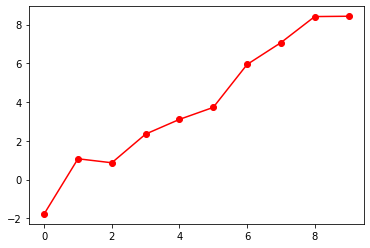

In [18]:
plt.plot(df['x'], df['y'], 'ro-')
plt.show()

80:20

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
Xtr, Xts, ytr, yts = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=1)
lr8020 = LinearRegression().fit(Xtr, ytr)
df['pred_8020'] = lr8020.predict(df[['x']])
df

,x,y,pred_8020
0,0,-1.768846,-1.198615
1,1,1.075552,-0.037131
2,2,0.869370,1.124353
3,3,2.348570,2.285837
4,4,3.106884,3.447321
5,5,3.725899,4.608804
6,6,5.938846,5.770288
7,7,7.064514,6.931772
8,8,8.410113,8.093256
9,9,8.427118,9.254740


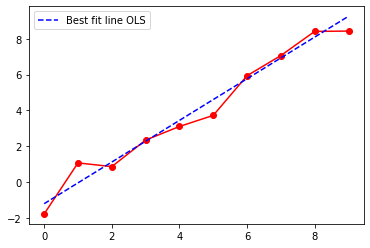

In [22]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best fit line OLS')
plt.legend()
plt.show()

In [26]:
print('coef lr8020: ', lr8020.coef_)
print('intercept lr8020: ', lr8020.intercept_)

coef lr8020:  [1.1614839]
intercept lr8020:  -1.1986150688604313


##### training

In [27]:
lr2 = LinearRegression().fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['pred_2'] = lr2.predict(df[['x']])
df

,x,y,pred_8020,pred_2
0,0,-1.768846,-1.198615,-1.768846
1,1,1.075552,-0.037131,1.075552
2,2,0.869370,1.124353,3.919950
3,3,2.348570,2.285837,6.764348
4,4,3.106884,3.447321,9.608746
5,5,3.725899,4.608804,12.453144
6,6,5.938846,5.770288,15.297542
7,7,7.064514,6.931772,18.141940
8,8,8.410113,8.093256,20.986338
9,9,8.427118,9.254740,23.830736


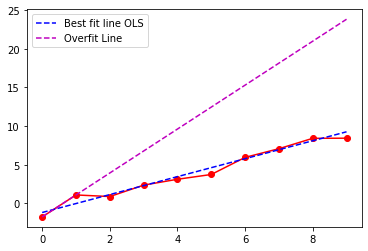

In [28]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['pred_8020'], 'b--', label='Best fit line OLS')
plt.plot(df['x'], df['pred_2'], 'm--', label='Overfit Line')

plt.legend()
plt.show()

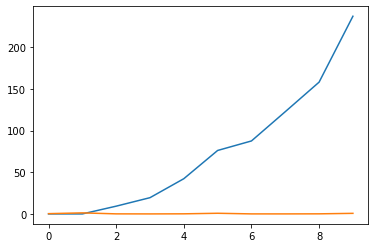

In [32]:
resid2 = (df['y'] - df['pred_2']) ** 2
resid8020 = (df['y'] - df['pred_8020']) ** 2

plt.plot(range(len(resid2)), resid)
plt.plot(range(len(resid2)), resid8020)

plt.show()

### Ridge 2 Data

In [ ]:
ridge_2 = Ridge(alpha=0)
ridge.fit(df[['x']].iloc[:2])

In [33]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [34]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
y = pd.Series(data['target'])
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1899)

### Ridge

In [37]:
hyperparam_alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in hyperparam_alpha:
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X_train, y_train)
    
    y_predict_train = ridgereg.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test = ridgereg.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    training_mse.append(mse_score)
    
    if score < mse_score:
        score = mse_score
        best_alpha = i

In [38]:
plt.figure(figsize=(20, 10))
sns.lineplot(range(len(hyperparam_alpha)), training_mse)
plt.legend(['testing_mse', 'training_mse'])
plt.xticks(range(len(hyperparam_alpha)), hyperparam_alpha)

ValueError: arrays must all be same length

<Figure size 1440x720 with 0 Axes>